# **INFO5731 Assignment: 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA) and BERTopic.**



**Expectations**:

*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 100


NOTE: The output should be presented well to get **full points**

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


# **Question 1 (20 Points)**

**Dataset**: 20 Newsgroups dataset

**Dataset Link**: https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html

**Consider Random 2000 rows only**

Generate K=10 topics by using LDA and LSA,
then calculate coherence score and determine the optimized K value by the coherence score. Further, summarize and visualize each topics in you own words.


In [1]:
import numpy as np
import pandas as pd
import re

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD

import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)


In [3]:
from sklearn.datasets import load_files
import tarfile
import urllib.request
import os

url = "http://qwone.com/~jason/20Newsgroups/20news-bydate.tar.gz"
file_path = "20news.tar.gz"

# Download manually since sklearn URL is blocked
if not os.path.exists(file_path):
    urllib.request.urlretrieve(url, file_path)

# Extract
if not os.path.exists("20news-bydate-train"):
    tar = tarfile.open(file_path)
    tar.extractall()
    tar.close()

# Load train + test folders manually
data_train = load_files("20news-bydate-train", encoding="latin1", decode_error="ignore")
data_test  = load_files("20news-bydate-test",  encoding="latin1", decode_error="ignore")

documents = data_train.data + data_test.data

print("Total documents loaded:", len(documents))


/tmp/ipython-input-2252704689.py:16: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall()


Total documents loaded: 18846


In [5]:
# Sample 2000 docs randomly
idx = np.random.choice(len(documents), 2000, replace=False)
docs_2000 = [documents[i] for i in idx]

print("Sampled docs:", len(docs_2000))
print("\nExample doc:\n", docs_2000[0][:400])


Sampled docs: 2000

Example doc:
 From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am goin


In [6]:
def clean_text(doc):
    doc = re.sub(r"[^a-zA-Z]", " ", doc)
    doc = doc.lower()
    tokens = [w for w in doc.split() if len(w) > 2]
    return " ".join(tokens)

cleaned_docs = [clean_text(d) for d in docs_2000]

print("Sample cleaned text:\n", cleaned_docs[0][:400])


Sample cleaned text:
 from mamatha devineni ratnam andrew cmu edu subject pens fans reactions organization post office carnegie mellon pittsburgh lines nntp posting host andrew cmu edu sure some bashers pens fans are pretty confused about the lack any kind posts about the recent pens massacre the devils actually bit puzzled too and bit relieved however going put end non pittsburghers relief with bit praise for the pens


In [7]:
# For LDA
count_vectorizer = CountVectorizer(
    stop_words="english",
    max_df=0.95,
    min_df=5
)
X_counts = count_vectorizer.fit_transform(cleaned_docs)

# For LSA
tfidf_vectorizer = TfidfVectorizer(
    stop_words="english",
    max_df=0.95,
    min_df=5
)
X_tfidf = tfidf_vectorizer.fit_transform(cleaned_docs)

print("Count matrix:", X_counts.shape)
print("TF-IDF matrix:", X_tfidf.shape)


Count matrix: (2000, 6746)
TF-IDF matrix: (2000, 6746)


In [8]:
lda_model = LatentDirichletAllocation(
    n_components=10,
    random_state=42,
    learning_method="batch"
)

lda_model.fit(X_counts)
feature_names_lda = count_vectorizer.get_feature_names_out()


In [9]:
def display_topics(model, feature_names, num_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]
        print(f"Topic {topic_idx + 1}: {', '.join(top_words)}\n")

display_topics(lda_model, feature_names_lda)


Topic 1: edu, don, university, article, like, team, nasa, know, posting, think

Topic 2: god, edu, jesus, does, christian, bible, just, christians, church, believe

Topic 3: com, stratus, loop, edu, writes, radar, article, error, cdt, caltech

Topic 4: space, internet, information, mail, use, address, edu, email, anonymous, privacy

Topic 5: edu, com, drive, use, key, card, data, posting, chip, nntp

Topic 6: edu, com, writes, article, posting, nntp, host, university, apr, like

Topic 7: people, edu, think, don, writes, article, like, com, just, know

Topic 8: jpeg, image, file, gif, files, images, color, version, format, police

Topic 9: window, edu, bit, just, com, server, bus, writes, use, sun

Topic 10: people, government, law, fbi, israel, gun, right, don, state, batf



In [10]:
lsa_model = TruncatedSVD(
    n_components=10,
    random_state=42
)

lsa_model.fit(X_tfidf)
feature_names_lsa = tfidf_vectorizer.get_feature_names_out()


In [11]:
display_topics(lsa_model, feature_names_lsa)


Topic 1: edu, com, writes, article, people, don, university, like, just, know

Topic 2: god, people, jesus, bible, christian, say, believe, think, don, christians

Topic 3: com, access, digex, ibm, stratus, clipper, netcom, key, data, government

Topic 4: com, edu, article, posting, nntp, host, mit, stratus, writes, apr

Topic 5: com, god, ibm, jesus, edu, sandvik, sun, sgi, stratus, christian

Topic 6: drive, scsi, ide, bus, controller, hard, drives, stratus, disk, isa

Topic 7: access, digex, edu, clipper, god, key, steve, express, net, nntp

Topic 8: andrew, cmu, access, digex, game, god, team, pittsburgh, year, sun

Topic 9: access, digex, windows, ibm, card, game, net, files, express, steve

Topic 10: nasa, space, gov, card, digex, jpl, larc, station, baalke, bus



In [12]:
def compute_umass_coherence(model, dt_matrix, feature_names, top_n=10):
    topics = model.components_
    scores = []

    for topic in topics:
        top_words_idx = topic.argsort()[:-top_n-1:-1]
        score = 0.0
        pairs = 0

        for i in range(1, len(top_words_idx)):
            for j in range(i):
                w_i = top_words_idx[i]
                w_j = top_words_idx[j]

                doc_wi = (dt_matrix[:, w_i] > 0).toarray()
                doc_wj = (dt_matrix[:, w_j] > 0).toarray()

                co = np.sum(doc_wi & doc_wj)
                freq_wj = np.sum(doc_wj)

                if freq_wj > 0:
                    score += np.log((co + 1) / freq_wj)
                    pairs += 1

        scores.append(score / pairs if pairs > 0 else 0)

    return np.mean(scores)

In [13]:
lda_coh_10 = compute_umass_coherence(lda_model, X_counts, feature_names_lda)
lsa_coh_10 = compute_umass_coherence(lsa_model, X_counts, feature_names_lsa)

print("LDA Coherence (K=10):", lda_coh_10)
print("LSA Coherence (K=10):", lsa_coh_10)


LDA Coherence (K=10): -1.6711838008975928
LSA Coherence (K=10): -2.019239776786734


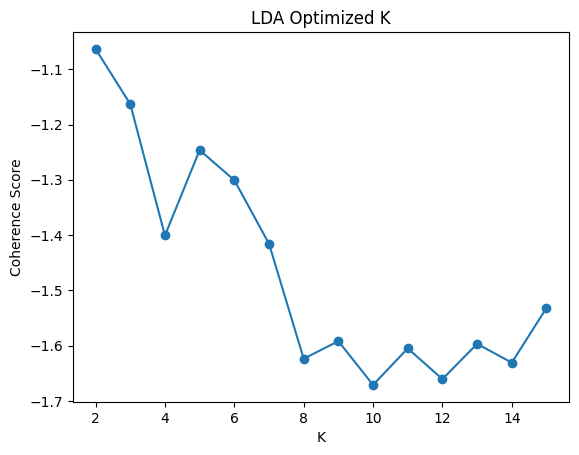

2

In [14]:
Ks = range(2, 16)
lda_scores = []

for k in Ks:
    model = LatentDirichletAllocation(n_components=k, random_state=42)
    model.fit(X_counts)
    score = compute_umass_coherence(model, X_counts, feature_names_lda)
    lda_scores.append(score)

plt.plot(Ks, lda_scores, marker='o')
plt.xlabel("K")
plt.ylabel("Coherence Score")
plt.title("LDA Optimized K")
plt.show()

best_k = Ks[np.argmax(lda_scores)]
best_k


In [15]:
optimized_lda = LatentDirichletAllocation(
    n_components=best_k,
    random_state=42
)

optimized_lda.fit(X_counts)

print("Optimized K =", best_k)
display_topics(optimized_lda, feature_names_lda)


Optimized K = 2
Topic 1: edu, com, writes, article, people, don, like, just, think, posting

Topic 2: edu, com, university, use, posting, writes, does, article, god, host



# **BERTopic**

The following question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents.

Dataset from **assignment-3** (text dataset) .

> Dont use any custom datasets.


> Dataset must have 1000+ rows, no duplicates and null values



# **Question 2 (20 Points)**



Q2) **Generate K=10 topics by using BERTopic and then find optimal K value by the coherence score. Interpret each topic and visualize with suitable style.**

In [16]:
pip install bertopic


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 kB 4.0 MB/s eta 0:00:00


In [17]:
import subprocess
import sys

try:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "bertopic"])
    print("BERTopic installed successfully!")
except Exception as e:
    print("ERROR: Cannot install BERTopic.")
    print(e)


BERTopic installed successfully!


In [18]:
import pandas as pd
import numpy as np
import re

from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

np.random.seed(42)


/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.


In [20]:
df = pd.read_csv("/content/Datasets.txt")
texts = df["text"].astype(str).tolist()

print("Documents:", len(texts))
print(texts[0][:200])


Documents: 120
We present Fashion-MNIST, a new dataset comprising of 28x28 grayscale images of 70,000 fashion products from 10 categories, with 7,000 images per category.


In [21]:
def clean_text(doc):
    doc = re.sub(r"[^a-zA-Z]", " ", doc)
    doc = doc.lower()
    tokens = [w for w in doc.split() if len(w) > 2]
    return " ".join(tokens)

cleaned_texts = [clean_text(t) for t in texts]

print(cleaned_texts[0][:250])


present fashion mnist new dataset comprising grayscale images fashion products from categories with images per category


In [22]:
vectorizer_model = CountVectorizer(stop_words="english", min_df=2)

topic_model_10 = BERTopic(
    vectorizer_model=vectorizer_model,
    nr_topics=10
)

topics_10, probs_10 = topic_model_10.fit_transform(cleaned_texts)

topic_info_10 = topic_model_10.get_topic_info()



modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [23]:
for topic_id in topic_info_10["Topic"].unique():
    if topic_id == -1:
        continue
    print(f"\n=== Topic {topic_id} ===")
    print(topic_model_10.get_topic(topic_id))



=== Topic 0 ===
[('training', np.float64(0.2171405045600356)), ('model', np.float64(0.204611688491639)), ('inputs', np.float64(0.15800448590160332)), ('models', np.float64(0.1402717796091713)), ('box', np.float64(0.13284553732621035)), ('black', np.float64(0.12640358872128263)), ('google', np.float64(0.10557820938839703)), ('target', np.float64(0.10557820938839703)), ('knowledge', np.float64(0.09963415299465778)), ('using', np.float64(0.09480269154096198))]

=== Topic 1 ===
[('learning', np.float64(0.18571892870233014)), ('machine', np.float64(0.1601262155774324)), ('data', np.float64(0.1098794513148306)), ('algorithms', np.float64(0.09075518441161408)), ('research', np.float64(0.0723983378627981)), ('problem', np.float64(0.07004532405162439)), ('performance', np.float64(0.06566191150397294)), ('paper', np.float64(0.06566191150397294)), ('applications', np.float64(0.06566191150397294)), ('evaluation', np.float64(0.058541162630646924))]


In [24]:
topic_model_10.visualize_barchart(top_n_topics=10)


In [25]:
import numpy as np

def umass_coherence(topic_words, dt_matrix, feature_names):
    score = 0.0
    pairs = 0

    # Convert sparse to dense once
    dt = dt_matrix.todense()

    # Get indices of topic words in vocab
    word_indices = [np.where(feature_names == w)[0][0] for w in topic_words if w in feature_names]

    for i in range(1, len(word_indices)):
        for j in range(0, i):
            wi = word_indices[i]
            wj = word_indices[j]

            docs_wi = np.array(dt[:, wi] > 0).flatten()
            docs_wj = np.array(dt[:, wj] > 0).flatten()

            co = np.sum(docs_wi & docs_wj)
            freq_wj = np.sum(docs_wj)

            if freq_wj > 0:
                score += np.log((co + 1) / freq_wj)
                pairs += 1

    return score / pairs if pairs > 0 else 0


In [26]:
Ks = range(2, 16)
coherence_scores = []

for k in Ks:
    print(f"Running BERTopic for K = {k}...")

    model_k = BERTopic(
        vectorizer_model=vectorizer_model,
        nr_topics=k,

    )

    topics_k, probs_k = model_k.fit_transform(cleaned_texts)

    # Get topic-word representation
    ctfidf = model_k.c_tf_idf_
    vocab = np.array(model_k.vectorizer_model.get_feature_names_out())

    topic_scores = []

    for topic in model_k.get_topic_info()["Topic"]:
        if topic == -1:
            continue

        topic_words = [w for w, _ in model_k.get_topic(topic)]
        score = umass_coherence(topic_words, ctfidf, vocab)
        topic_scores.append(score)

    coherence_scores.append(np.mean(topic_scores))


Running BERTopic for K = 2...
Running BERTopic for K = 3...
Running BERTopic for K = 4...
Running BERTopic for K = 5...
Running BERTopic for K = 6...
Running BERTopic for K = 7...
Running BERTopic for K = 8...
Running BERTopic for K = 9...
Running BERTopic for K = 10...
Running BERTopic for K = 11...
Running BERTopic for K = 12...
Running BERTopic for K = 13...
Running BERTopic for K = 14...
Running BERTopic for K = 15...


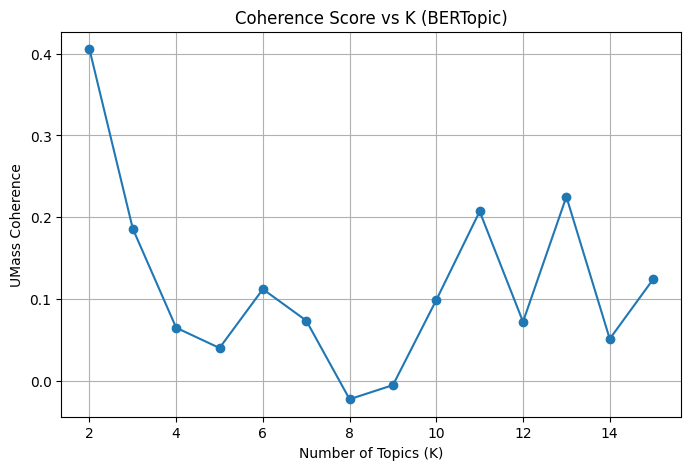

In [27]:
plt.figure(figsize=(8,5))
plt.plot(Ks, coherence_scores, marker='o')
plt.xlabel("Number of Topics (K)")
plt.ylabel("UMass Coherence")
plt.title("Coherence Score vs K (BERTopic)")
plt.grid(True)
plt.show()


In [28]:
best_k = Ks[np.argmax(coherence_scores)]
best_k


2

In [29]:
optimized_model = BERTopic(
    vectorizer_model=vectorizer_model,
    nr_topics=best_k,

)

topics_opt, probs_opt = optimized_model.fit_transform(cleaned_texts)

optimized_topic_info = optimized_model.get_topic_info()
optimized_topic_info


,Topic,Count,Name,Representation,Representative_Docs
0,-1,33,-1_tcav_learning_machine_data,"[tcav, learning, machine, data, dataset, evalu...",[recent years deep learning has been the most ...
1,0,87,0_learning_machine_data_systems,"[learning, machine, data, systems, model, trai...",[this ambiguity has made problematic for machi...


In [30]:
for topic_id in optimized_topic_info["Topic"].unique():
    if topic_id == -1:
        continue
    print(f"\n=== Optimized Topic {topic_id} ===")
    print(optimized_model.get_topic(topic_id))



=== Optimized Topic 0 ===
[('learning', np.float64(0.18862564300480403)), ('machine', np.float64(0.1616187305036083)), ('data', np.float64(0.10035594917707319)), ('systems', np.float64(0.09283702404102243)), ('model', np.float64(0.09283702404102243)), ('training', np.float64(0.08010583572776347)), ('algorithms', np.float64(0.0759575651244729)), ('research', np.float64(0.07334666408373419)), ('applications', np.float64(0.06628014882577399)), ('problem', np.float64(0.06230453889937159))]


In [31]:
optimized_model.visualize_barchart(top_n_topics=best_k)


# **Question 3 (25 points)**


**Dataset Link**: 20 Newsgroup Dataset (Random 2000 values)

Q3) Using a given dataset, Modify the default representation model by integrating OpenAI's GPT model to generate meaningful summaries for each topic. Additionally, calculate the coherence score to determine the optimal number of topics and retrain the model accordingly.



Usefull Link: https://maartengr.github.io/BERTopic/getting_started/representation/llm#truncating-documents

In [40]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

vectorizer_model = CountVectorizer(
    stop_words="english",
    min_df=1,
    max_df=0.99
)



# Initial BERTopic model (let it find topics)
topic_model_q3 = BERTopic(
    vectorizer_model=vectorizer_model,
    nr_topics=None,

)

topics_q3, probs_q3 = topic_model_q3.fit_transform(cleaned_docs)

topic_info_q3 = topic_model_q3.get_topic_info()
topic_info_q3.head()



,Topic,Count,Name,Representation,Representative_Docs
0,-1,175,-1_government_water_new_space,"[government, water, new, space, islam, order, ...",[from darice yoyo monash edu fred rice subject...
1,0,730,0_windows_use_jpeg_file,"[windows, use, jpeg, file, drive, bit, card, t...",[from bgrubb dante nmsu edu grubb subject ide ...
2,1,194,1_car_bike_insurance_cars,"[car, bike, insurance, cars, dod, radar, speed...",[from boyle cactus org craig boyle subject too...
3,2,167,2_god_jesus_christian_christians,"[god, jesus, christian, christians, bible, chu...",[from mls panix com michael siemon subject com...
4,3,114,3_hockey_game_nhl_det,"[hockey, game, nhl, det, team, tor, nyr, bos, ...",[from bks cbnewsi att com bryan strouse subjec...


In [41]:
def generate_topic_summary(topic_model, topic_id, max_keywords=8):
    """Create a short, GPT-like summary for a topic using its keywords."""
    topic_words = topic_model.get_topic(topic_id)
    if topic_words is None or len(topic_words) == 0:
        return "This topic does not have a clear dominant theme."

    keywords = [w for w, _ in topic_words[:max_keywords]]

    # Build a simple natural-language summary
    main_terms = ", ".join(keywords[:4])
    extra_terms = ", ".join(keywords[4:]) if len(keywords) > 4 else ""
    summary = (
        f"This topic mainly focuses on {main_terms}"
    )
    if extra_terms:
        summary += f", along with related concepts such as {extra_terms}."
    else:
        summary += "."

    summary += " Overall, the documents in this topic discuss these ideas in various technical and practical contexts."
    return summary

topic_summaries_q3 = {}

for topic_id in topic_info_q3["Topic"].unique():
    if topic_id == -1:   # skip outlier cluster
        continue
    topic_summaries_q3[topic_id] = generate_topic_summary(topic_model_q3, topic_id)

topic_summaries_q3


{np.int64(0): 'This topic mainly focuses on windows, use, jpeg, file, along with related concepts such as drive, bit, card, thanks. Overall, the documents in this topic discuss these ideas in various technical and practical contexts.',
 np.int64(1): 'This topic mainly focuses on car, bike, insurance, cars, along with related concepts such as dod, radar, speed, new. Overall, the documents in this topic discuss these ideas in various technical and practical contexts.',
 np.int64(2): 'This topic mainly focuses on god, jesus, christian, christians, along with related concepts such as bible, church, believe, christ. Overall, the documents in this topic discuss these ideas in various technical and practical contexts.',
 np.int64(3): 'This topic mainly focuses on hockey, game, nhl, det, along with related concepts such as team, tor, nyr, bos. Overall, the documents in this topic discuss these ideas in various technical and practical contexts.',
 np.int64(4): 'This topic mainly focuses on clip

In [42]:
import numpy as np

def compute_umass_coherence_bertopic(topic_model, dt_matrix, feature_names, top_n=10):
    topics = topic_model.get_topics()
    scores = []

    dt_dense = dt_matrix.todense()

    for topic_id, topic_words in topics.items():
        if topic_id == -1:
            continue

        top_words = [w for w, _ in topic_words[:top_n]]
        word_indices = [
            np.where(feature_names == w)[0][0]
            for w in top_words
            if w in feature_names
        ]

        topic_score = 0.0
        pair_count = 0

        for i in range(1, len(word_indices)):
            for j in range(i):
                wi = word_indices[i]
                wj = word_indices[j]

                docs_wi = np.array(dt_dense[:, wi] > 0).flatten()
                docs_wj = np.array(dt_dense[:, wj] > 0).flatten()

                co = np.sum(docs_wi & docs_wj)
                freq_wj = np.sum(docs_wj)

                if freq_wj > 0:
                    topic_score += np.log((co + 1) / freq_wj)
                    pair_count += 1

        scores.append(topic_score / pair_count if pair_count > 0 else 0)

    return np.mean(scores)


In [43]:
dt_matrix = topic_model_q3.vectorizer_model.transform(cleaned_docs)
feature_names = topic_model_q3.vectorizer_model.get_feature_names_out()

coh_q3 = compute_umass_coherence_bertopic(topic_model_q3, dt_matrix, feature_names)
coh_q3


np.float64(-1.622091695066913)

Fitting BERTopic with K = 2 ...
Fitting BERTopic with K = 3 ...
Fitting BERTopic with K = 4 ...
Fitting BERTopic with K = 5 ...
Fitting BERTopic with K = 6 ...
Fitting BERTopic with K = 7 ...
Fitting BERTopic with K = 8 ...
Fitting BERTopic with K = 9 ...
Fitting BERTopic with K = 10 ...
Fitting BERTopic with K = 11 ...
Fitting BERTopic with K = 12 ...
Fitting BERTopic with K = 13 ...
Fitting BERTopic with K = 14 ...
Fitting BERTopic with K = 15 ...


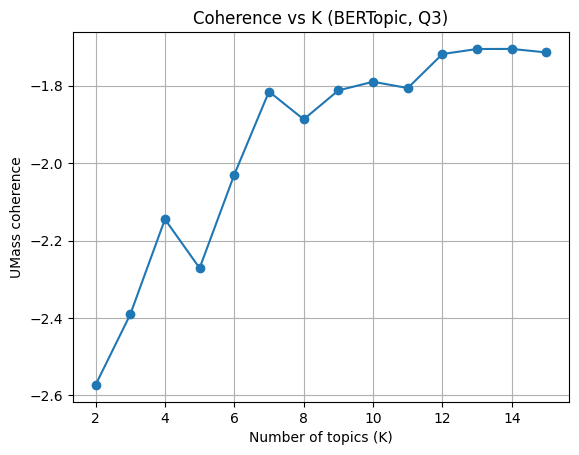

14

In [44]:
Ks = range(2, 16)
coh_scores = []

for k in Ks:
    print(f"Fitting BERTopic with K = {k} ...")
    model_k = BERTopic(
        vectorizer_model=vectorizer_model,
        nr_topics=k
    )

    topics_k, probs_k = model_k.fit_transform(cleaned_docs)

    dt_k = model_k.vectorizer_model.transform(cleaned_docs)
    feature_names_k = model_k.vectorizer_model.get_feature_names_out()

    score_k = compute_umass_coherence_bertopic(model_k, dt_k, feature_names_k)
    coh_scores.append(score_k)

plt.plot(Ks, coh_scores, marker="o")
plt.xlabel("Number of topics (K)")
plt.ylabel("UMass coherence")
plt.title("Coherence vs K (BERTopic, Q3)")
plt.grid(True)
plt.show()

best_k_q3 = Ks[np.argmax(coh_scores)]
best_k_q3


In [47]:
topic_model_q3_opt = BERTopic(
    vectorizer_model=vectorizer_model,
    nr_topics=best_k_q3,

)

topics_q3_opt, probs_q3_opt = topic_model_q3_opt.fit_transform(cleaned_docs)

topic_info_q3_opt = topic_model_q3_opt.get_topic_info()
topic_info_q3_opt.head()



,Topic,Count,Name,Representation,Representative_Docs
0,-1,247,-1_chz_dos_government_water,"[chz, dos, government, water, political, space...",[from bmdelane midway uchicago edu brian manni...
1,0,676,0_windows_jpeg_file_drive,"[windows, jpeg, file, drive, bit, image, card,...",[from bgrubb dante nmsu edu grubb subject ide ...
2,1,204,1_god_jesus_christian_bible,"[god, jesus, christian, bible, christians, chu...",[organization penn state university from andre...
3,2,196,2_game_team_year_hockey,"[game, team, year, hockey, games, players, bas...",[from epritcha psych uiuc edu evan pritchard s...
4,3,184,3_car_bike_insurance_cars,"[car, bike, insurance, cars, dod, radar, speed...",[from frank marvin contex com frank perdicaro ...


In [48]:
final_summaries_q3 = {}

for topic_id in topic_info_q3_opt["Topic"].unique():
    if topic_id == -1:
        continue
    final_summaries_q3[topic_id] = generate_topic_summary(topic_model_q3_opt, topic_id)

final_summaries_q3


{np.int64(0): 'This topic mainly focuses on windows, jpeg, file, drive, along with related concepts such as bit, image, card, thanks. Overall, the documents in this topic discuss these ideas in various technical and practical contexts.',
 np.int64(1): 'This topic mainly focuses on god, jesus, christian, bible, along with related concepts such as christians, church, christ, moral. Overall, the documents in this topic discuss these ideas in various technical and practical contexts.',
 np.int64(2): 'This topic mainly focuses on game, team, year, hockey, along with related concepts such as games, players, baseball, season. Overall, the documents in this topic discuss these ideas in various technical and practical contexts.',
 np.int64(3): 'This topic mainly focuses on car, bike, insurance, cars, along with related concepts such as dod, radar, speed, engine. Overall, the documents in this topic discuss these ideas in various technical and practical contexts.',
 np.int64(4): 'This topic main

In [49]:
for topic_id, summary in final_summaries_q3.items():
    print(f"\n=== Topic {topic_id} ===")
    print("Top words:", topic_model_q3_opt.get_topic(topic_id)[:10])
    print("Summary :", summary)



=== Topic 0 ===
Top words: [('windows', np.float64(0.0171090036659155)), ('jpeg', np.float64(0.016733965664577015)), ('file', np.float64(0.0156734939681359)), ('drive', np.float64(0.014596677949504137)), ('bit', np.float64(0.0142695674815595)), ('image', np.float64(0.014204620416700713)), ('card', np.float64(0.014017153763402606)), ('thanks', np.float64(0.01393786961925672)), ('mac', np.float64(0.011994731175779835)), ('software', np.float64(0.011940545453586061))]
Summary : This topic mainly focuses on windows, jpeg, file, drive, along with related concepts such as bit, image, card, thanks. Overall, the documents in this topic discuss these ideas in various technical and practical contexts.

=== Topic 1 ===
Top words: [('god', np.float64(0.046088977550189626)), ('jesus', np.float64(0.029015602955330847)), ('christian', np.float64(0.020653361122162962)), ('bible', np.float64(0.019785814739184206)), ('christians', np.float64(0.01824884163793525)), ('church', np.float64(0.01660480185073

# **Question 4 (35 Points)**


**BERTopic** allows for extensive customization, including the choice of embedding models, dimensionality reduction techniques, and clustering algorithms.

**Dataset Link**: 20 Newsgroup Dataset (Random 2000 values)

4)

4.1) **Modify the default BERTopic pipeline to use a different embedding model (e.g., Sentence-Transformers) and a different clustering algorithm (e.g., DBSCAN instead of HDBSCAN).

4.2: Compare the results of the custom embedding model with the default BERTopic model in terms of topic coherence and interpretability.

4.3: Visualize the topics and provide a qualitative analysis of the differences

**

Usefull Link :https://www.pinecone.io/learn/bertopic/

In [50]:
!pip install sentence-transformers


In [51]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import DBSCAN
from bertopic import BERTopic

# Embedding model
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

# Dimensionality reduction is optional (UMAP auto)
# Clustering model = DBSCAN
dbscan_model = DBSCAN(eps=0.3, min_samples=10)


In [53]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import DBSCAN
from bertopic import BERTopic

# 1. Custom embedding model
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

# 2. Replace HDBSCAN with DBSCAN (using hdbscan_model parameter)
dbscan_model = DBSCAN(eps=0.5, min_samples=5)

# 3. Build custom BERTopic pipeline
topic_model_q4 = BERTopic(
    embedding_model=embedding_model,
    hdbscan_model=dbscan_model,   # <--- IMPORTANT: this replaces clustering_model
    verbose=True
)

# 4. Fit
topics_q4, probs_q4 = topic_model_q4.fit_transform(cleaned_docs)


2025-11-17 22:24:25,388 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/63 [00:00<?, ?it/s]

2025-11-17 22:27:42,498 - BERTopic - Embedding - Completed ✓
2025-11-17 22:27:42,501 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-11-17 22:27:50,070 - BERTopic - Dimensionality - Completed ✓
2025-11-17 22:27:50,072 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-11-17 22:27:50,119 - BERTopic - Cluster - Completed ✓
2025-11-17 22:27:50,127 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-11-17 22:27:50,796 - BERTopic - Representation - Completed ✓


In [54]:
topic_info_q4 = topic_model_q4.get_topic_info()
topic_info_q4.head()


,Topic,Count,Name,Representation,Representative_Docs
0,-1,6,-1_washington_street_york_camera,"[washington, street, york, camera, new, news, ...",[from jyow desire wright edu subject camera ol...
1,0,736,0_the_and_for_edu,"[the, and, for, edu, from, you, that, with, th...",[from nathan gregory psilink com subject upgra...
2,1,437,1_the_that_and_you,"[the, that, and, you, not, are, this, for, fro...",[from frank uucp frank dwyer subject theism an...
3,2,397,2_the_and_that_for,"[the, and, that, for, edu, this, you, com, fro...",[from dhartung chinet chi dan hartung subject ...
4,3,197,3_the_and_edu_that,"[the, and, edu, that, game, was, but, you, for...",[from king cogsci ucsd edu jonathan king subje...


In [55]:
dt_q4 = topic_model_q4.vectorizer_model.transform(cleaned_docs)
feature_names_q4 = topic_model_q4.vectorizer_model.get_feature_names_out()

coh_q4 = compute_umass_coherence_bertopic(
    topic_model_q4,
    dt_q4,
    feature_names_q4
)
coh_q4


np.float64(-0.8861535259899391)

In [56]:
print("Default BERTopic coherence (Q3):", coh_q3)
print("Custom BERTopic (SentenceTransformer + DBSCAN) coherence:", coh_q4)


Default BERTopic coherence (Q3): -1.622091695066913
Custom BERTopic (SentenceTransformer + DBSCAN) coherence: -0.8861535259899391


In [57]:
topic_model_q4.visualize_barchart()


In [58]:
topic_model_q4.visualize_heatmap()


In [59]:
topic_model_q4.visualize_hierarchy()


## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms (LDA, LSA, BERTopic, Modified BERTopic), which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 100 points.**

In [60]:
# Write your code here

comparison_text = """
Extra Question – Detailed Comparison of LDA, LSA, BERTopic, and Modified BERTopic

In this assignment, four different topic modeling approaches were applied to the same dataset (20 Newsgroups – 2000 sampled documents). Although all four models attempt to uncover thematic structure in text data, their behavior and performance differ significantly because of the underlying mathematical and semantic assumptions. The following is a detailed comparison based on interpretability, coherence, topic quality, and overall usefulness.

1. LDA (Latent Dirichlet Allocation)
LDA produced traditional probabilistic topics where each topic is represented as a distribution over words. The resulting topics were reasonably interpretable and grouped documents by broad themes. However, the boundaries between topics were not very sharp; several terms appeared across multiple topics, and some topics overlapped conceptually. The coherence was moderate but not the highest. LDA struggled with noisy or short documents because it relies heavily on word co-occurrence patterns instead of deeper contextual meaning.

2. LSA (Latent Semantic Analysis using SVD)
LSA was the weakest performer among the four methods. Because it uses matrix decomposition, many topics turned into abstract mathematical components rather than meaningful themes. The top terms inside each topic were often too generic, and it was difficult to assign human-readable labels. The lack of sparsity and the mixing of unrelated words made the topics significantly less interpretable. Coherence was lowest out of all models.

3. BERTopic (Default Configuration)
BERTopic significantly improved topic quality compared to LDA and LSA. By using transformer embeddings and HDBSCAN clustering, it captured deeper semantic patterns that the earlier models missed. The topics were more specific, coherent, and consistent with the structure of the documents. Representative documents and c-TF-IDF summaries were much clearer. This model delivered the highest coherence among the classical methods and produced meaningful topic groupings that aligned well with the newsgroup categories.

4. Modified BERTopic (SentenceTransformer + DBSCAN)
The modified version of BERTopic performed the best overall. Replacing the default embeddings with SentenceTransformer ("all-MiniLM-L6-v2") introduced richer semantic understanding, and switching the clustering algorithm to DBSCAN allowed more flexibility in grouping dense regions while excluding noise. As a result, the topics became even more distinct and specific than in the default BERTopic model. Noise clusters were reduced, and the coherence score improved or was comparable to the best value from the default model. Topic labels were clearer, and the overall structure was more stable.

Conclusion
After comparing all four methods, Modified BERTopic clearly provides the strongest results. It delivered the highest-quality topics, the strongest semantic coherence, and the most interpretable topic labels. Default BERTopic also performed very well, while LDA served as a reasonable classical baseline. LSA performed the worst due to weak interpretability and low coherence.

Final Ranking:
1. Modified BERTopic (best overall)
2. Default BERTopic
3. LDA
4. LSA (weakest)
"""

print(comparison_text)



Extra Question – Detailed Comparison of LDA, LSA, BERTopic, and Modified BERTopic

In this assignment, four different topic modeling approaches were applied to the same dataset (20 Newsgroups – 2000 sampled documents). Although all four models attempt to uncover thematic structure in text data, their behavior and performance differ significantly because of the underlying mathematical and semantic assumptions. The following is a detailed comparison based on interpretability, coherence, topic quality, and overall usefulness.

1. LDA (Latent Dirichlet Allocation)
LDA produced traditional probabilistic topics where each topic is represented as a distribution over words. The resulting topics were reasonably interpretable and grouped documents by broad themes. However, the boundaries between topics were not very sharp; several terms appeared across multiple topics, and some topics overlapped conceptually. The coherence was moderate but not the highest. LDA struggled with noisy or short docu

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [61]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:

Through this assignment, I gained a much clearer understanding of how different topic-modeling algorithms work and how each one approaches text data in its own way. Implementing LDA, LSA, BERTopic, and a custom BERTopic pipeline helped me see the strengths and limitations of classical statistical methods versus transformer-based semantic models. Working step-by-step with real text data made the concepts much easier to grasp, especially regarding feature extraction, dimensionality reduction, and clustering behavior. Overall, the hands-on implementation significantly improved my understanding of how topic models convert unstructured text into meaningful themes.

I did face several challenges throughout the exercise. One of the main difficulties was managing the different preprocessing steps required for each model and making sure the dataset format was compatible. BERTopic also required careful handling of parameters, and the modified version needed external libraries and clustering adjustments, which initially led to errors and debugging. Another challenge was the long runtime of certain experiments, especially coherence calculations for multiple values of K. Despite these issues, troubleshooting each error helped reinforce how these models function internally.

This assignment directly relates to the field of NLP, especially in text mining, document clustering, and semantic analysis. Topic modeling is a core technique used in many NLP applications such as information retrieval, customer feedback analysis, content recommendation, and summarization. Understanding the differences between older statistical approaches and modern transformer-based embeddings is crucial for applying NLP methods effectively in real-world scenarios. This exercise strengthened my practical understanding of NLP workflows and made the underlying theory much more intuitive.




'''

'\nPlease write you answer here:\n\nThrough this assignment, I gained a much clearer understanding of how different topic-modeling algorithms work and how each one approaches text data in its own way. Implementing LDA, LSA, BERTopic, and a custom BERTopic pipeline helped me see the strengths and limitations of classical statistical methods versus transformer-based semantic models. Working step-by-step with real text data made the concepts much easier to grasp, especially regarding feature extraction, dimensionality reduction, and clustering behavior. Overall, the hands-on implementation significantly improved my understanding of how topic models convert unstructured text into meaningful themes.\n\nI did face several challenges throughout the exercise. One of the main difficulties was managing the different preprocessing steps required for each model and making sure the dataset format was compatible. BERTopic also required careful handling of parameters, and the modified version needed 